# Aluno: Marcelo Barros de Azevedo Vieira

In [10]:
!pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


In [11]:
import numpy as np 
import pandas as pd
import sys
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import euclidean
import scipy.cluster.hierarchy as sch

## 1. Versão do Python: 3.13.1

In [12]:
print(f"Versão do Python: {sys.version}")

Versão do Python: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 10:07:17) [Clang 14.0.6 ]


## 2. Demonstrando que esta sendo utilizado o ambiente anaconda

In [13]:
!conda info

/Users/marcelodeazevedo/miniconda3/lib/python3.12/site-packages/conda/base/context.py:201: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/configuration/use-condarc.html

  deprecated.topic(

     active environment : base
    active env location : /Users/marcelodeazevedo/miniconda3
            shell level : 1
       user config file : /Users/marcelodeazevedo/.condarc
 populated config files : 
          conda version : 24.11.1
    conda-build version : not installed
         python version : 3.12.4.final.0
                 solver : libmamba (default)
       virtual packages : __archspec=1=m1
                          __conda=24.11.1=0
              

## 3. Bibliotecas utilizadas no ambiente virtual anadonda:

In [14]:
!conda list

# packages in environment at /Users/marcelodeazevedo/miniconda3:
#
# Name                    Version                   Build  Channel
anaconda-anon-usage       0.4.4           py312hd6b623d_100  
anaconda-cli-base         0.4.1           py312hca03da5_1  
anaconda-client           1.13.0          py312hca03da5_0  
anaconda-cloud-auth       0.7.2           py312hca03da5_0  
anaconda-navigator        2.6.4           py312hca03da5_0  
annotated-types           0.6.0           py312hca03da5_0  
anyio                     4.6.0                    pypi_0    pypi
appnope                   0.1.4                    pypi_0    pypi
archspec                  0.2.3              pyhd3eb1b0_0  
argon2-cffi               23.1.0                   pypi_0    pypi
argon2-cffi-bindings      21.2.0                   pypi_0    pypi
arrow                     1.3.0                    pypi_0    pypi
asttokens                 2.4.1                    pypi_0    pypi
async-lru                 2.0.4                 

## 4. Arquivo com as bibliotecas instaladas

In [15]:
!conda list > requirements.txt

## 5. Printscreen do ambiente onde o projeto está sendo executado

<img src="img/print.png" />

## 6. GitHub do Projeto

### https://github.com/marcelobazevedo/validacao_modelos_clusterizacao

## 1. Escolha da Base de Dados
### A Base de dados escolhida foi a California Housing Prices, disponível em https://www.kaggle.com/datasets/camnugent/california-housing-prices/data

## 2. Justificativa para a escolha da base de dados
### O dataset "California Housing Prices" de 1990 é amplamente utilizado em projetos de aprendizado de máquina e análise de dados devido à sua relevância educacional, metodológica e histórica, mesmo com dados antigos. Ele é ideal para introduzir conceitos fundamentais como regressão, engenharia de features e aprendizado supervisionado, graças à sua estrutura clara e documentação acessível. Além disso, muitos padrões subjacentes aos preços de imóveis, como localização, renda e densidade populacional, permanecem válidos e generalizáveis para diferentes contextos.

### Seu uso é também justificado pela possibilidade de estudos históricos e comparativos, como a análise das condições do mercado imobiliário em 1990 frente a dados atuais, permitindo explorar mudanças urbanas e socioeconômicas ao longo do tempo. Por ser simplificado, o dataset oferece um ambiente controlado para aprendizado e prática antes de lidar com datasets mais complexos, consolidando habilidades analíticas essenciais.

### Portanto, sua utilização é valiosa não apenas como exercício de modelagem teórica e prática, mas também para desenvolver insights generalizáveis e transferíveis para problemas modernos.

In [16]:
df = pd.read_csv('file/housing.csv')
df.reset_index(inplace=True, drop=True)

In [17]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## 3. Gráfico de Faixa dinâmica e o que deve ser feito com os dados antes da clusterização
### Normalizar os dados, transformar números do tipo float para inteiros e buscar e corrigir valores nulos

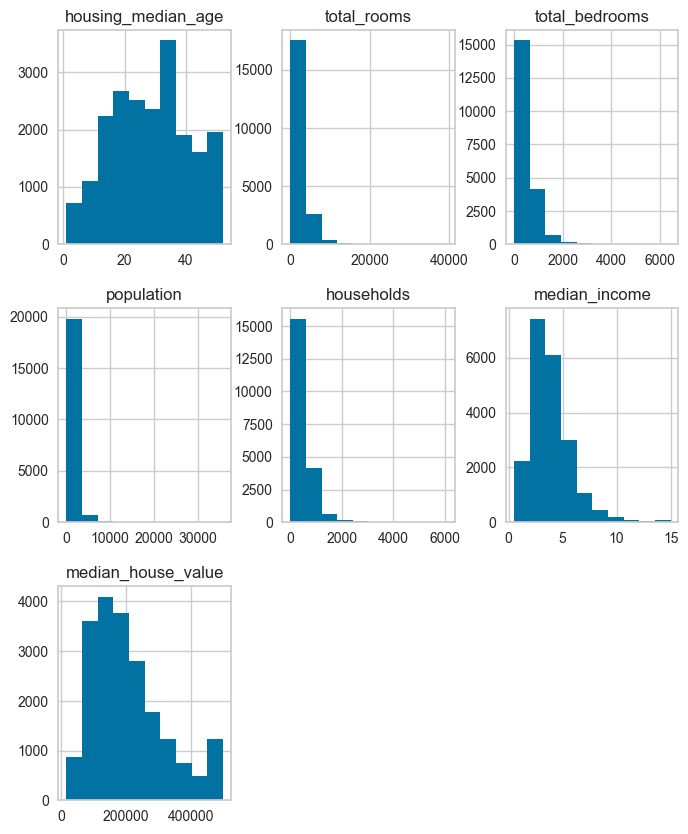

In [18]:
data = df.drop(['ocean_proximity','longitude','latitude'],axis=1)
p = data.hist(figsize = (8,10))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [21]:
data.shape

(20640, 7)

## Identificação de valores nulos

In [22]:
print(data.isnull().sum())

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64


## Correção dos valos nulos

In [23]:
data.dropna(inplace=True)

In [24]:
print(data.isnull().sum())

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


## Tranformando dados do tipo float em int

In [25]:
data['housing_median_age'] = data['housing_median_age'].astype('int')
data['total_rooms'] = data['total_rooms'].astype('int')
data['total_bedrooms'] = data['total_bedrooms'].astype('int')
data['population'] = data['population'].astype('int')
data['households'] = data['households'].astype('int')
data['median_income'] = data['median_income'].astype('int')
data['median_house_value'] = data['median_house_value'].astype('int')

In [26]:
data

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,41,880,129,322,126,8,452600
1,21,7099,1106,2401,1138,8,358500
2,52,1467,190,496,177,7,352100
3,52,1274,235,558,219,5,341300
4,52,1627,280,565,259,3,342200
...,...,...,...,...,...,...,...
20635,25,1665,374,845,330,1,78100
20636,18,697,150,356,114,2,77100
20637,17,2254,485,1007,433,1,92300
20638,18,1860,409,741,349,1,84700


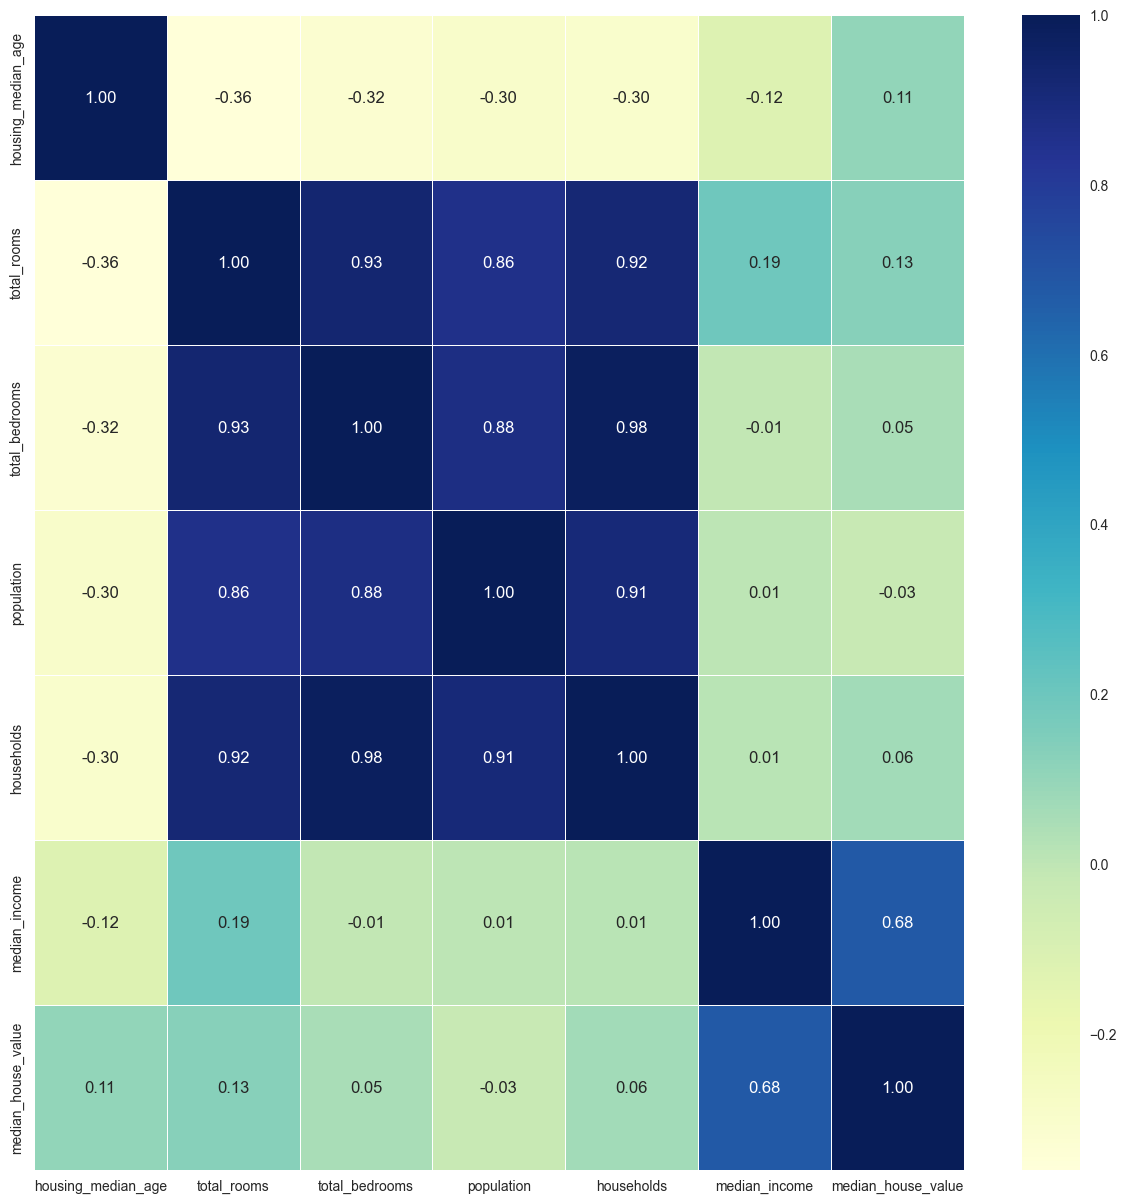

In [27]:
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()

## Normalização dos dados

In [28]:
x = data.values
x

array([[    41,    880,    129, ...,    126,      8, 452600],
       [    21,   7099,   1106, ...,   1138,      8, 358500],
       [    52,   1467,    190, ...,    177,      7, 352100],
       ...,
       [    17,   2254,    485, ...,    433,      1,  92300],
       [    18,   1860,    409, ...,    349,      1,  84700],
       [    16,   2785,    616, ...,    530,      2,  89400]])

In [29]:
scaler = StandardScaler()
X = scaler.fit_transform(x)
X

array([[ 0.98216331, -0.8038126 , -0.97032521, ..., -0.97683327,
         2.38510785,  2.12881864],
       [-0.60621017,  2.0421302 ,  1.34827594, ...,  1.67037262,
         2.38510785,  1.31362603],
       [ 1.85576873, -0.53518928, -0.82556097, ..., -0.84342665,
         1.86735089,  1.25818254],
       ...,
       [-0.92388486, -0.17504183, -0.12547157, ..., -0.17377773,
        -1.23919082, -0.99247676],
       [-0.84446619, -0.35534437, -0.30583358, ..., -0.39350628,
        -1.23919082, -1.05831591],
       [-1.00330353,  0.06795473,  0.18541559, ...,  0.07995643,
        -0.72143387, -1.01759959]])

## Clusterizacão
### k-means

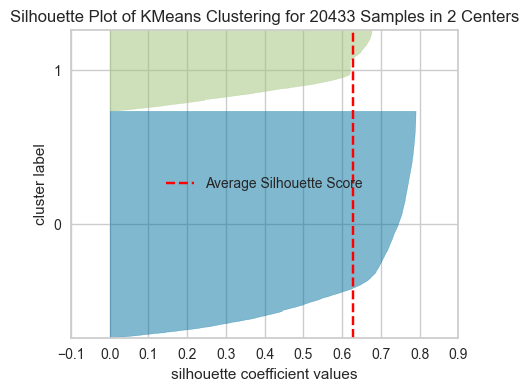

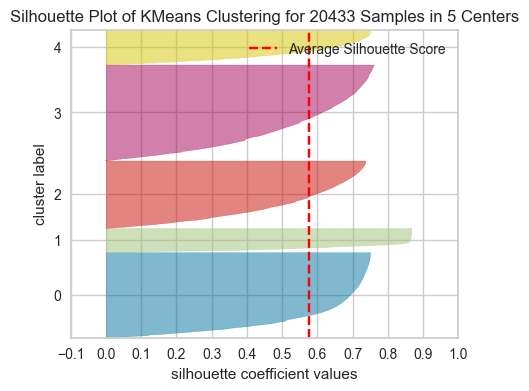

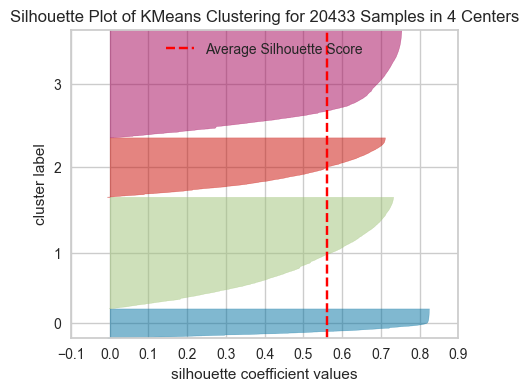

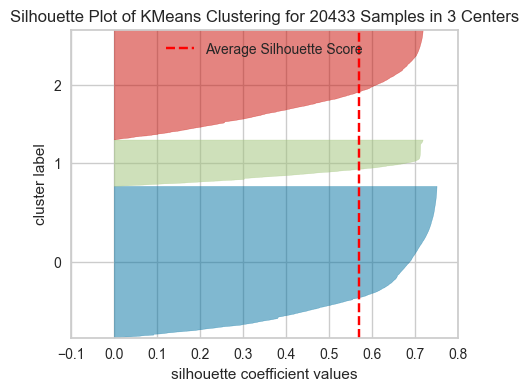

In [30]:
#indice de silhueta 
km = KMeans(n_clusters=2).fit(x)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

visualizer = SilhouetteVisualizer(km, ax=ax, colors='yellowbrick')
visualizer.fit(x)
visualizer.show();



km = KMeans(n_clusters=5).fit(x)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

visualizer = SilhouetteVisualizer(km, ax=ax, colors='yellowbrick')
visualizer.fit(x)
visualizer.show();


km = KMeans(n_clusters=4).fit(x)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

visualizer = SilhouetteVisualizer(km, ax=ax, colors='yellowbrick')
visualizer.fit(x)
visualizer.show();


km = KMeans(n_clusters=3).fit(x)

fig, ax = plt.subplots(1, 1, figsize=(5, 4))

visualizer = SilhouetteVisualizer(km, ax=ax, colors='yellowbrick')
visualizer.fit(x)
visualizer.show();


## 1 e 2. Justificar o número de clusters

### A diferença mais marcante entre os gráficos está no tamanho das silhuetas de cada um. Observa-se que, com 2 clusters, há uma maior discrepância nos tamanhos das silhuetas, indicando uma menor consistência na formação dos grupos. Por outro lado, com 4 clusters, os tamanhos das silhuetas são mais uniformes, o que sugere que esta configuração proporciona uma divisão mais equilibrada e coesa dos dados, sendo, portanto, a melhor escolha para a quantidade de clusters.

## 1. K-means



In [46]:
kmeans=KMeans(n_clusters=4,random_state=10) #init='k-means++',
y=kmeans.fit_predict(X)
y

array([0, 3, 0, ..., 2, 2, 2], dtype=int32)

In [47]:
data['Cluster']=y
data.groupby('Cluster').mean()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
Cluster,,,,,,,
0,31.282156,2390.799592,407.264946,1029.524683,389.401042,5.686368,365636.229393
1,13.816872,11907.697531,2310.693416,5927.767490,2099.370370,3.932099,220182.347737
2,31.514947,1676.651601,366.838434,1020.807384,341.135854,2.528737,147768.709609
3,20.036122,4353.580750,919.498019,2380.515031,846.112328,3.237474,196756.478210


In [48]:
### Clusters 0,1,2 e 3
df_0=data[data['Cluster']==0]
df_1=data[data['Cluster']==1]
df_2=data[data['Cluster']==2]
df_3=data[data['Cluster']==3]

In [49]:
df_0.head(3)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Cluster
0,41,880,129,322,126,8,452600,0
2,52,1467,190,496,177,7,352100,0
3,52,1274,235,558,219,5,341300,0


In [50]:
df_1.head(3)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Cluster
95,36,5329,2477,3469,2323,2,130000,1
283,22,12842,2048,4985,1967,5,371000,1
508,14,7355,2408,3100,2051,4,143800,1


In [51]:
import numpy as np
from sklearn.metrics import pairwise_distances

def DBCV(X, labels, metric='euclidean'):
    """
    Density-Based Clustering Validation (DBCV).
    Calcula a métrica de validação baseada em densidade para clusters gerados por DBSCAN.
    """
    def core_distance(point, neighbors, metric):
        distances = pairwise_distances([point], neighbors, metric=metric)
        return np.min(distances[distances > 0])

    def reachability_distance(p, o, neighbors, metric):
        return max(core_distance(p, neighbors, metric), np.linalg.norm(p - o))

    def cluster_density(X_cluster, metric):
        n = len(X_cluster)
        distances = pairwise_distances(X_cluster, metric=metric)
        return np.sum(distances) / (n * (n - 1))

    clusters = np.unique(labels)
    total_density = 0
    for cluster in clusters:
        if cluster == -1:  # Ignore noise
            continue
        cluster_points = X[labels == cluster]
        density = cluster_density(cluster_points, metric)
        total_density += density

    return total_density / len(clusters)

## 2. DBScan

In [52]:
num_pipeline = Pipeline(
    [
      ("imputer", SimpleImputer(strategy="median")),
    ]
)
df_prepared = num_pipeline.fit_transform(x)
df_prepared = preprocessing.normalize(df_prepared)

In [53]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2) 
df_principal = pca.fit_transform(df_prepared) 
df_principal = pd.DataFrame(df_principal) 
df_principal.columns = ['P1', 'P2'] 
df_principal

,P1,P2
0,-0.017062,-0.000235
1,0.001782,-0.004042
2,-0.014778,-0.000756
3,-0.014986,-0.000337
4,-0.014079,-0.000837
...,...,...
20428,0.005517,-0.001245
20429,-0.008732,-0.000447
20430,0.008321,-0.002719
20431,0.005041,-0.003352


In [54]:
db=DBSCAN(eps=0.5,min_samples=10).fit(data)
labels=db.labels_

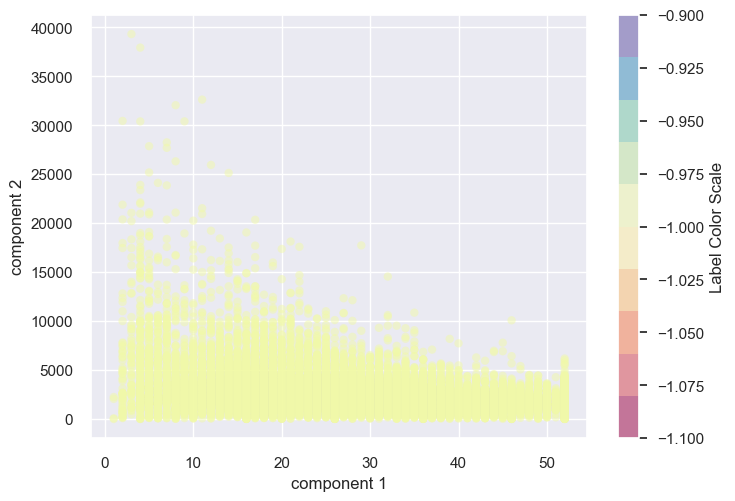

In [55]:
from matplotlib import colormaps
cmap=colormaps.get_cmap('Spectral').resampled(10)

plt.scatter(x[:, 0], x[:, 1],
            c= labels.astype(float), edgecolor='none', alpha=0.5,
            cmap=cmap)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label="Label Color Scale")
plt.show()

## 3. Compare os dois resultados, aponte as semelhanças e diferenças e interprete

### K-means recuperou 4 grupos distintos já o dbscan não conseguiu recuperar

## K-means

* facil de ser implementado e interpretado
* é mais escalavel mais eficiente
* requer que o usuario diga inicialmente o n° de clusters *sensivel a outliers

## DBScan

* simples e facil de ser implementado
* não requer que o usuario diga p n° de cluster *não é sensivel a outlires

O algoritmo K-means é um método de aprendizado de máquina supervisionado que determina o número de centróides kk, atribuindo cada ponto de dados ao cluster mais próximo e buscando minimizar a distância total dos pontos aos centróides. Em contraste, o DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é baseado na densidade de pontos, identificando clusters como conjuntos densos de pontos conectados. Ele é capaz de dividir regiões densas em clusters, encontrando agrupamentos com formas arbitrárias, mesmo em bases de dados com ruído.



## 4. Além do índice de silhueta, outras duas métricas de validação foram utilizadas para comparar os resultados:

Dendrograma - O dendrograma é uma representação gráfica em forma de árvore que demonstra os agrupamentos formados a cada etapa do processo hierárquico e seus níveis de similaridade. Analisando o dendrograma, é possível identificar que os dados foram agrupados em quatro grandes grupos, representando bem as divisões naturais do conjunto de dados.

KElbowVisualizer - O método do cotovelo, representado pelo KElbowVisualizer, avalia a proximidade dos pontos dentro de cada cluster. Observando o gráfico gerado, o ponto ideal para kk é indicado em 3 ou 4 clusters, com k=4k=4 apresentando o melhor desempenho em termos de tempo de resposta e consistência do algoritmo.

## 5. Comparação com o Índice de Silhueta

* O índice de silhueta mede a qualidade dos clusters considerando a distância entre os centróides e os pontos que os cercam. Ao analisar os gráficos, k=4k=4 apresentou silhuetas mais uniformes e bem distribuídas, indicando uma melhor configuração de agrupamento.

### Validação para DBSCAN

Para o algoritmo DBSCAN, uma métrica mais adequada é o DBCV (Density-Based Cluster Validation), que avalia a qualidade dos clusters com base na densidade dos pontos e não apenas na distância. Essa métrica é particularmente útil para bases de dados com ruído, pois captura a forma dos agrupamentos e considera variações de densidade.

### Com base nos resultados das métricas de validação analisadas (índice de silhueta, dendrograma e KElbowVisualizer), o valor ideal para k nos agrupamentos é 4. Essa escolha oferece a melhor combinação de consistência entre os clusters e eficiência na resposta do algoritmo.


In [41]:
df=data.drop(['Cluster'],axis=1)

Text(0, 0.5, 'Euclidean Distance')

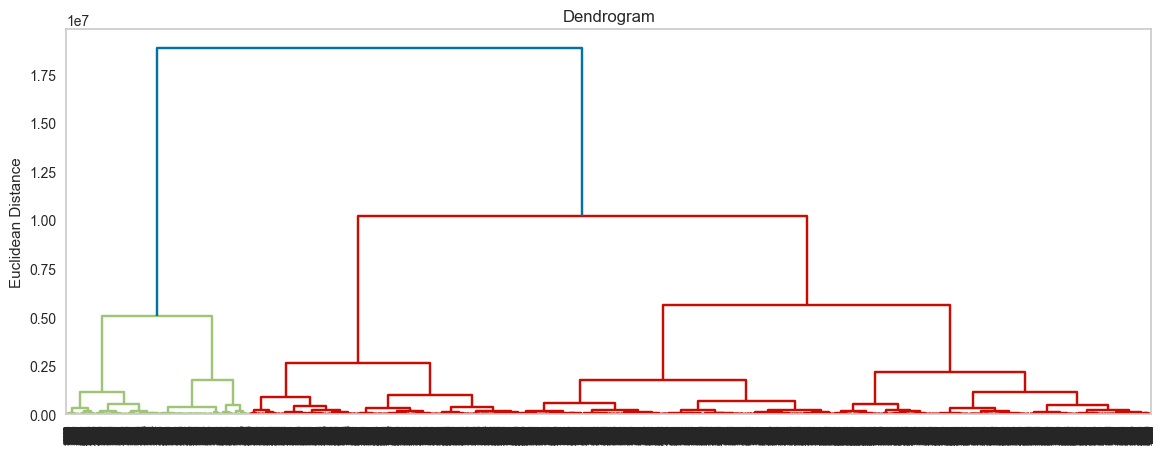

In [42]:
plt.figure(figsize=(14, 5))
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(df, method='ward')) #, labels=df.index
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

In [43]:
Wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=9)
    kmeans.fit(x)
    Wcss.append(kmeans.inertia_)
print(Wcss)

[272394861195557.38, 85139069740659.94, 38736688028295.414, 21111318378341.402, 12269251877454.535, 8758499004866.464, 6471603906594.478, 4923763650377.529, 3785972457034.503, 3163284787015.993]


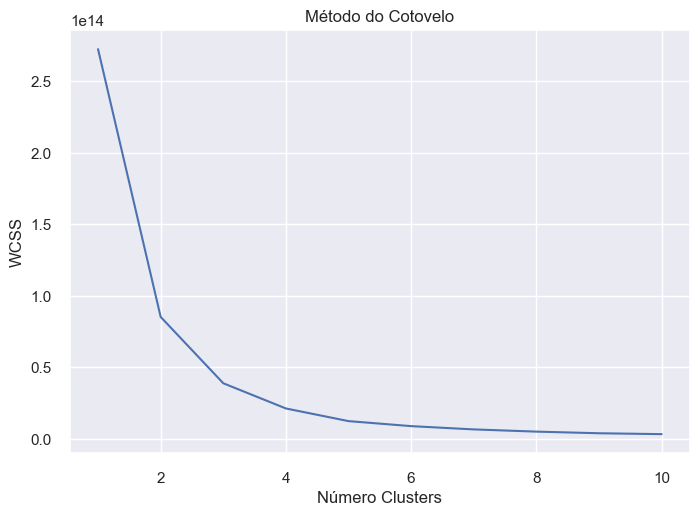

In [44]:
sns.set()
plt.plot(range(1,11),Wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número Clusters')
plt.ylabel('WCSS')
plt.show()

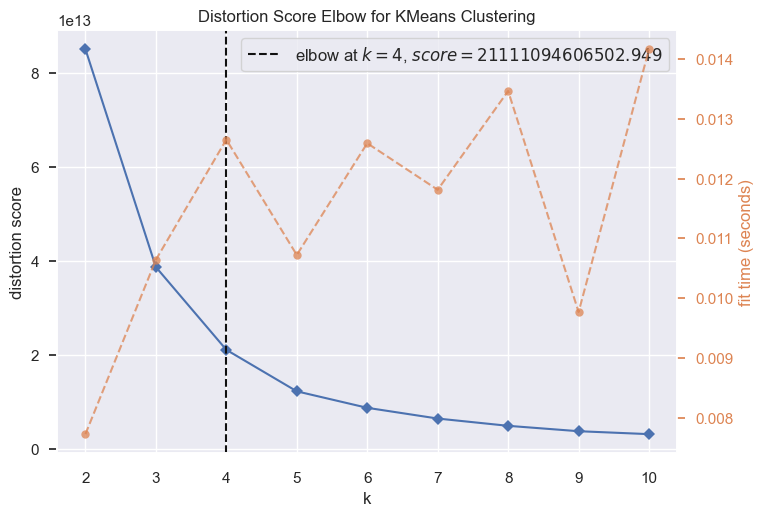

In [45]:
from yellowbrick.cluster import KElbowVisualizer
el = KElbowVisualizer(KMeans(), k=10)
el.fit(df)
el.show();

## 5. O Índice de Silhueta é adequado para escolher o número de Clusters no DBSCAN?

Resposta: Quando não existem rótulos disponíveis, é comum recorrer a métricas objetivas, como o Silhouette Score, para avaliar e decidir sobre o resultado final de um agrupamento. O Silhouette Score é uma métrica que mede a coesão e separação dos clusters, com valores variando entre -1 e 1. No entanto, ele não considera o ruído no cálculo e baseia-se exclusivamente em distâncias.

Como o DBSCAN é um algoritmo baseado em densidade, a dependência de distâncias viola um pressuposto fundamental desse método. Ignorar o ruído no cálculo da métrica compromete a avaliação da qualidade dos clusters em técnicas baseadas em densidade.

Portanto, métricas como o Silhouette Score não são **adequadas para medir a qualidade dos agrupamentos** gerados pelo DBSCAN.

# Medidas de Similaridade

## 1. Definição do Problema
Um problema apresenta 10 séries temporais distintas, que precisam ser agrupadas em 3 grupos com base no critério de similaridade, utilizando o valor máximo da correlação cruzada entre elas.
Passos para calcular a similaridade:

* Etapa 1: Para cada par de séries temporais, aplicar um deslocamento (lag) em unidades de tempo.
* Etapa 2: A cada deslocamento, calcular a correlação de Pearson entre as duas séries.
* Etapa 3: Repetir o processo de deslocamento e cálculo da correlação até obter uma curva de correlação cruzada para cada par de séries.
* Etapa 4: Identificar o ponto de maior correlação na curva, que representará o valor máximo de correlação cruzada entre as séries.
* Etapa 5: Usar os valores máximos de correlação como métrica de similaridade entre as séries temporais.

## 2. Algoritmo de Clusterização

Algoritmo sugerido: KNN (K-Nearest Neighbors)

* O KNN é adequado para estimar densidades, verificando regiões de alta e baixa densidade. Ele fornece um índice de similaridade baseado em distância com valores que variam de -1 a 1.
* Justificativa: É eficaz para dados onde a proximidade entre os valores de similaridade determina o agrupamento.

### Algoritmo sugerido: DTWclust (Dynamic Time Warping Clustering)

* O DTWclust utiliza técnicas relacionadas à distância dinâmica e oferece implementações de agrupamentos particionais e hierárquicos.
* Justificativa: Ele pode ser facilmente personalizado com métricas de distância específicas e definições de centróides, sendo uma escolha robusta para séries temporais.

## 3. Caso de Uso

* Um exemplo de aplicação seria agrupar séries temporais relacionadas ao clima, como padrões anuais de temperatura, ou ciclos de compra e venda em diferentes períodos de tempo. Esses dados podem ser usados para identificar tendências sazonais ou comportamentais.

## 4. Sugestão de outra Estratégia para Medir Similaridade

1. Definição da Estratégia
Medir a similaridade entre séries temporais com base no comportamento de subida e descida em relação ao tempo.

Passos para implementar a estratégia:

* Etapa 1: Identificar o movimento das séries temporais (variações positivas ou negativas ao longo do tempo).
* Etapa 2: Normalizar as séries temporais para reduzir o impacto de valores extremos.
* Etapa 3: Agrupar os movimentos das séries com base na sincronia entre elas, comparando os padrões de subida e descida ao longo do tempo.
* Etapa 4: Utilizar a correlação de Pearson como métrica de similaridade para quantificar o alinhamento dos movimentos.
* Etapa 5: Utilizar o valor máximo de correlação (entre -1 e 1) para identificar o grau de similaridade entre as séries.

Essa abordagem considera a sincronia do comportamento das séries temporais, independentemente do ruído ou deslocamentos, permitindo uma análise mais contextual das similaridades.